In [1]:
# for loading and manipulating dataframes
import pandas as pd

# for various plotting functions
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

# to scale our data so that we can perform "sensible" clustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# to provide an implementation of the k-means algorithm
from sklearn.cluster import KMeans

import numpy as np
from kmodes.kprototypes import KPrototypes

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [2]:
pots = pd.read_csv("Pots_clean.csv")
pots.head()

,productcode,price,maker,name,description,height,width,depth,materials,technique,firing,decoration
0,AM470Y165,47.0,Andy Mason,ovalled bowl cream satin motif,this stoneware bowl is wheel-thrown with a cre...,8.0,25.5,22.0,Stoneware,Thrown,Electric,Glaze
1,AM470Y164,47.0,Andy Mason,ovalled bowl cream satin motif,this stoneware bowl is wheel-thrown with a cre...,8.0,25.0,22.0,Stoneware,Thrown,Electric,Glaze
2,AM470Y163,38.0,Andy Mason,dinner plate cream satin plain,this stoneware plate is wheel-thrown with a cr...,3.0,25.0,15.3,Stoneware,Thrown,Electric,Glaze
3,AM470Y162,38.0,Andy Mason,dinner plate cream satin plain,this stoneware plate is wheel-thrown with a cr...,3.0,25.0,15.3,Stoneware,Thrown,Electric,Glaze
4,AM470Y161,38.0,Andy Mason,dinner plate cream satin plain,this stoneware plate is wheel-thrown with a cr...,3.0,24.5,15.1,Stoneware,Thrown,Electric,Glaze


In [3]:
pots_final = pots.drop(columns = ["productcode", "name", "description", "maker"])
cols = ["price", "height", "depth", "width"]
scaler = StandardScaler()
pots_final[cols] = pd.DataFrame(scaler.fit_transform(pots[cols]), columns = cols)
pots_final.head(2)

,price,height,width,depth,materials,technique,firing,decoration
0,-0.564882,-0.69404,1.085478,2.097354,Stoneware,Thrown,Electric,Glaze
1,-0.564882,-0.69404,1.025789,2.097354,Stoneware,Thrown,Electric,Glaze


In [4]:
pots_final.columns

Index(['price', 'height', 'width', 'depth', 'materials', 'technique', 'firing',
       'decoration'],
      dtype='object')

In [5]:
categorical_columns = [4, 5, 6, 7] #make sure to specify correct indices

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14


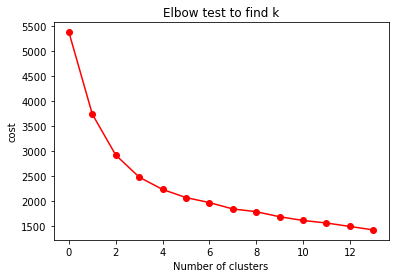

In [6]:
cost = []
for i_clus in range(1, 15):
        kprototype = KPrototypes(n_clusters = i_clus, init='Huang')
        kprototype.fit_predict(pots_final, categorical=categorical_columns)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(i_clus))
    
plt.plot( cost, 'ro-', label="cost")
plt.title("Elbow test to find k")
plt.xlabel("Number of clusters")
plt.ylabel("cost")
plt.show()

In [7]:
kprototype = KPrototypes(n_clusters = 5, init = 'Huang', n_init = 10)
kprototype.fit_predict(pots_final, categorical=categorical_columns)

array([2, 2, 1, ..., 1, 3, 3], dtype=uint16)

In [8]:
print(kprototype.labels_)
print(len(kprototype.labels_))

[2 2 1 ... 1 3 3]
1126


In [9]:
pots["cluster labels"] = kprototype.labels_
pots['category'] = pots['cluster labels'].map({0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth'})
pots.sample(3)

,productcode,price,maker,name,description,height,width,depth,materials,technique,firing,decoration,cluster labels,category
1036,LH221Y4641,854.0,Lisa Hammond,Tan Slip Very Large Jug,this tall angled jug is wheel-thrown and decor...,45.0,18.0,13.0,Stoneware,Thrown,Wood,Glaze,4,fifth
562,AT488Y248,75.0,Ali Tomlin,Bowl,this bowl is wheel-thrown in porcelain. the s...,15.0,15.0,11.0,Porcelain,Thrown,Electric,Slip decoration,3,fourth
135,SS349Y276,183.0,Suleyman Saba,Eclipse Bowl celadon/black,this finely thrown stoneware bowl has a nuance...,6.5,19.0,12.7,Stoneware,Thrown,Electric,Glaze,1,second


In [10]:
pots.rename(columns = {'cluster labels':'count'}, inplace = True)
pots.groupby('category').agg(
    {
        'count':'count',
        'materials': lambda x: x.value_counts().index[0],
        'technique': lambda x: x.value_counts().index[0],
        'firing': lambda x: x.value_counts().index[0],
        'decoration': lambda x: x.value_counts().index[0],
        'price': 'mean',
        'height': 'mean',
        'width': 'mean',
        'depth': 'mean'
    }
).round(1).reset_index()

,category,count,materials,technique,firing,decoration,price,height,width,depth
0,fifth,215,Stoneware,Hand built,Electric,Glaze,515.3,28.5,17.5,10.8
1,first,71,Stoneware,Hand built,Electric,Glaze,2084.0,33.1,28.3,16.5
2,fourth,471,Porcelain,Thrown,Electric,Glaze,124.9,11.0,9.6,8.2
3,second,249,Stoneware,Thrown,Electric,Glaze,164.6,10.0,18.1,13.1
4,third,120,Earthenware,Hand built,Electric,Glaze,365.4,9.6,30.5,20.7


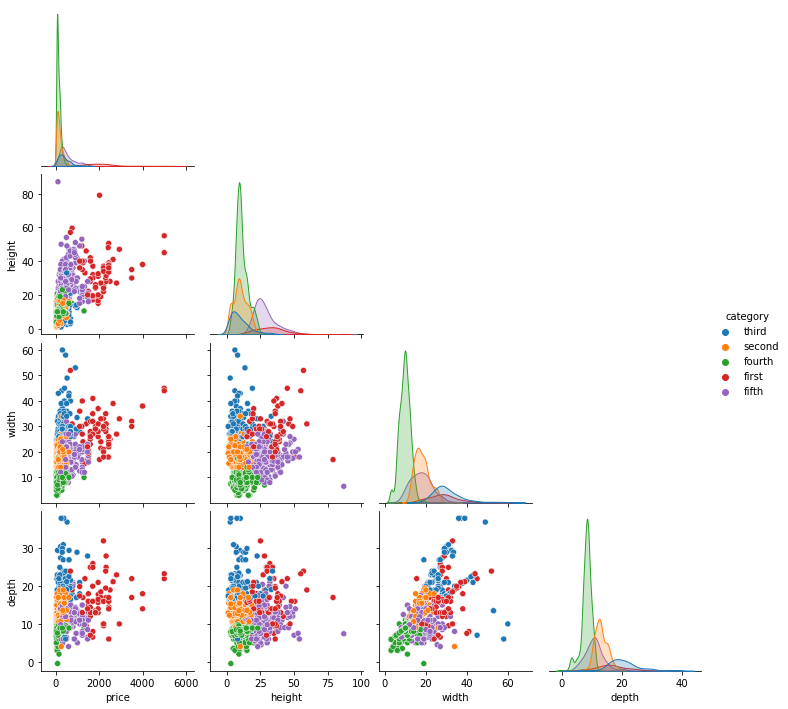

In [11]:
sns.pairplot(pots.drop(['count'],axis=1), corner = True, hue = 'category')

In [12]:
pots_final.head(5)

,price,height,width,depth,materials,technique,firing,decoration
0,-0.564882,-0.694040,1.085478,2.097354,Stoneware,Thrown,Electric,Glaze
1,-0.564882,-0.694040,1.025789,2.097354,Stoneware,Thrown,Electric,Glaze
2,-0.581260,-1.164356,1.025789,0.742982,Stoneware,Thrown,Electric,Glaze
3,-0.581260,-1.164356,1.025789,0.742982,Stoneware,Thrown,Electric,Glaze
4,-0.581260,-1.164356,0.966101,0.702553,Stoneware,Thrown,Electric,Glaze


In [13]:
pots_encoded = pd.get_dummies(pots_final)
print(pots_encoded.shape)
pots_encoded.head(5)

(1126, 19)


,price,height,width,depth,materials_Bone China,materials_Earthenware,materials_Porcelain,materials_Stoneware,technique_Hand built,technique_Thrown,firing_Electric,firing_Gas,firing_Raku,firing_Wood,decoration_Glaze,decoration_Lustre,decoration_Sgraffito,decoration_Slip decoration,decoration_Terra Sigillata
0,-0.564882,-0.694040,1.085478,2.097354,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0
1,-0.564882,-0.694040,1.025789,2.097354,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0
2,-0.581260,-1.164356,1.025789,0.742982,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0
3,-0.581260,-1.164356,1.025789,0.742982,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0
4,-0.581260,-1.164356,0.966101,0.702553,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0


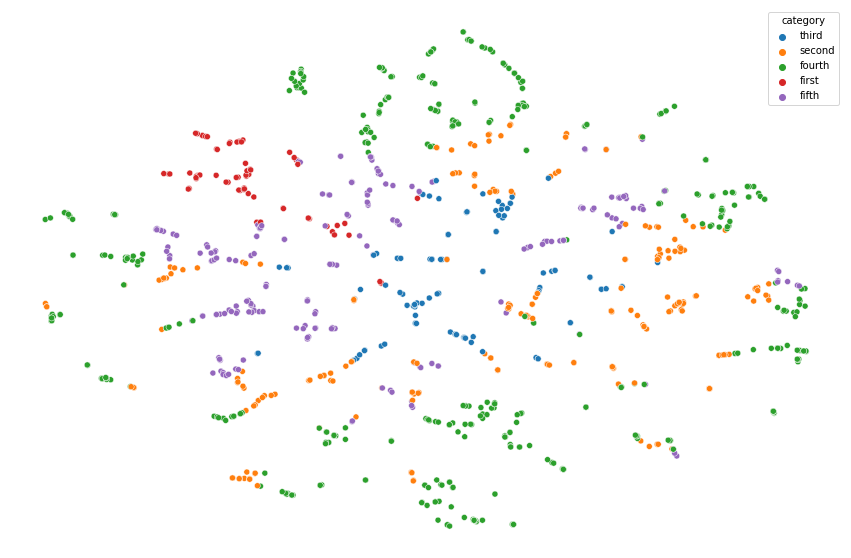

In [14]:
tsne = TSNE(perplexity=10, n_iter=300, init='random', random_state=137)

embed = tsne.fit_transform(pots_encoded)

plt.figure(figsize = (15, 10))
sns.scatterplot(x=embed[:,0], y=embed[:,1], hue=pots.category)
plt.axis('off');

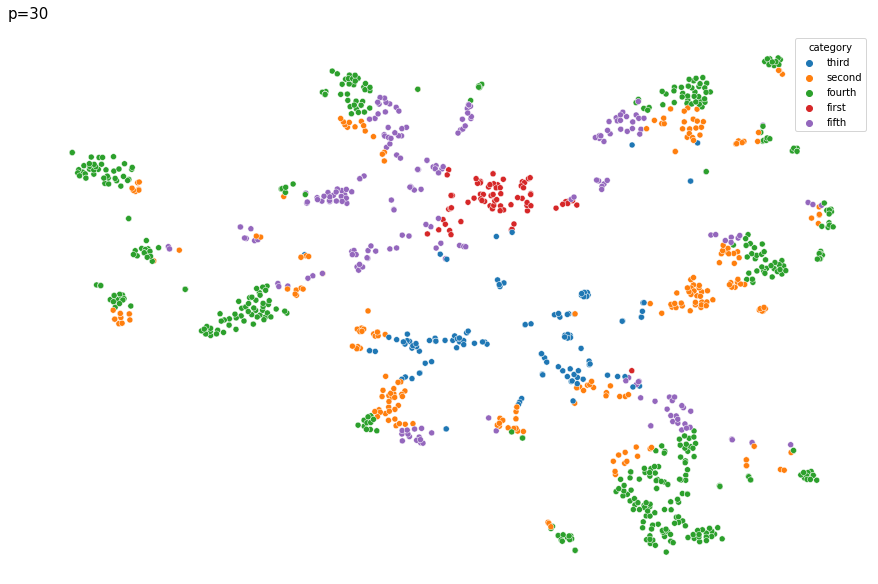

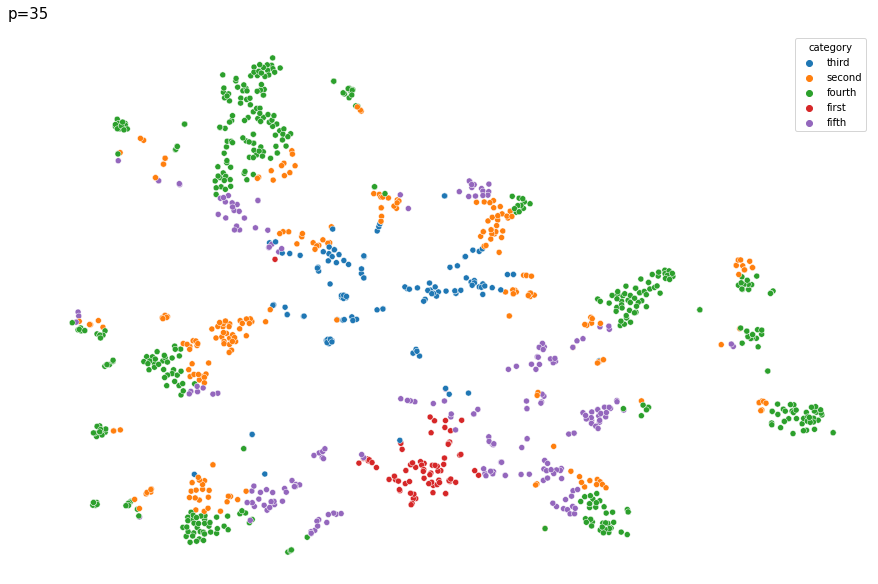

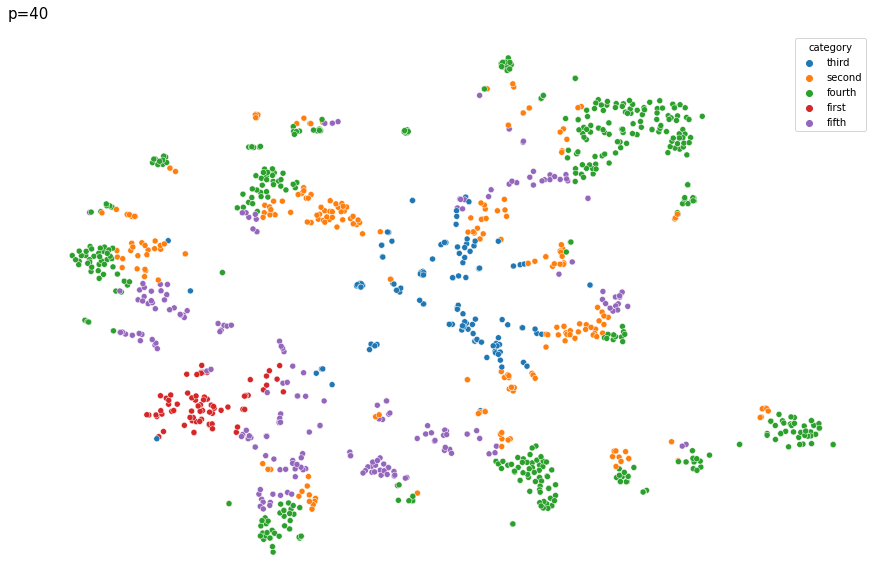

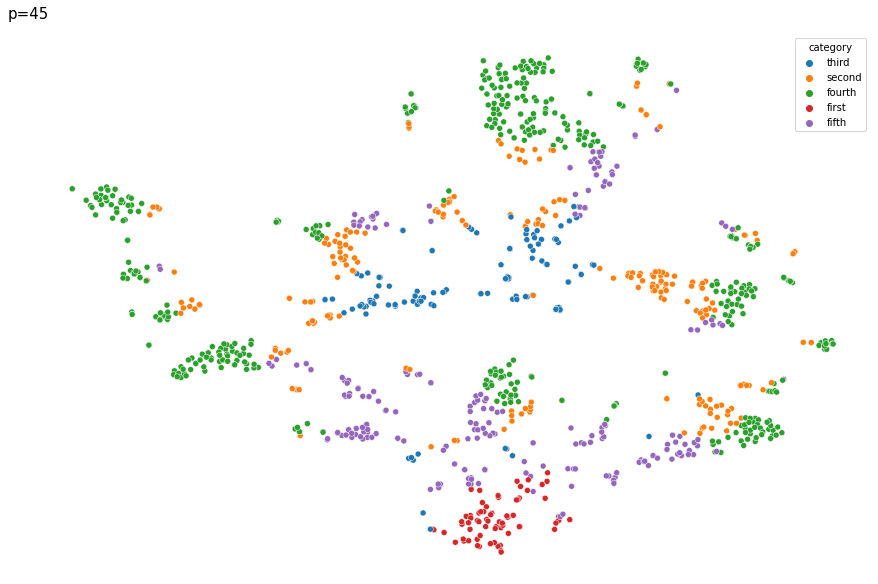

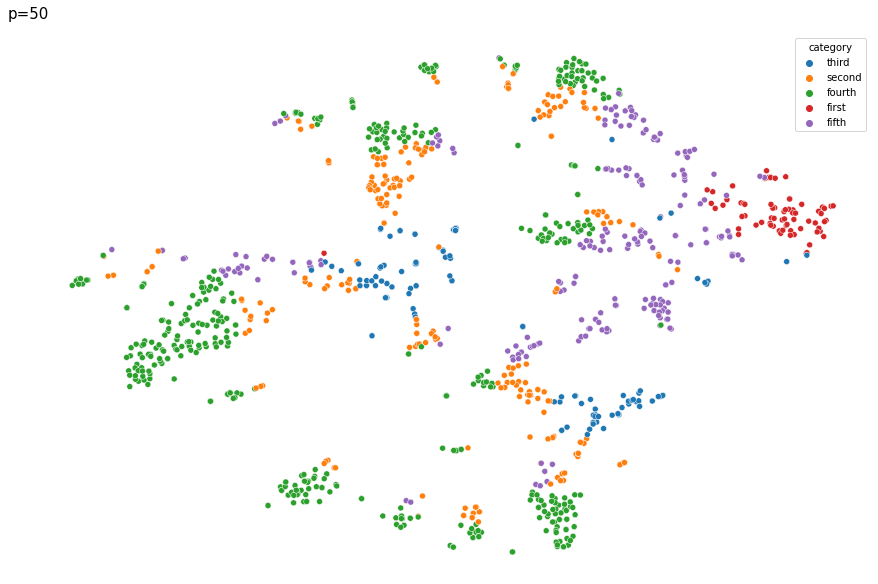

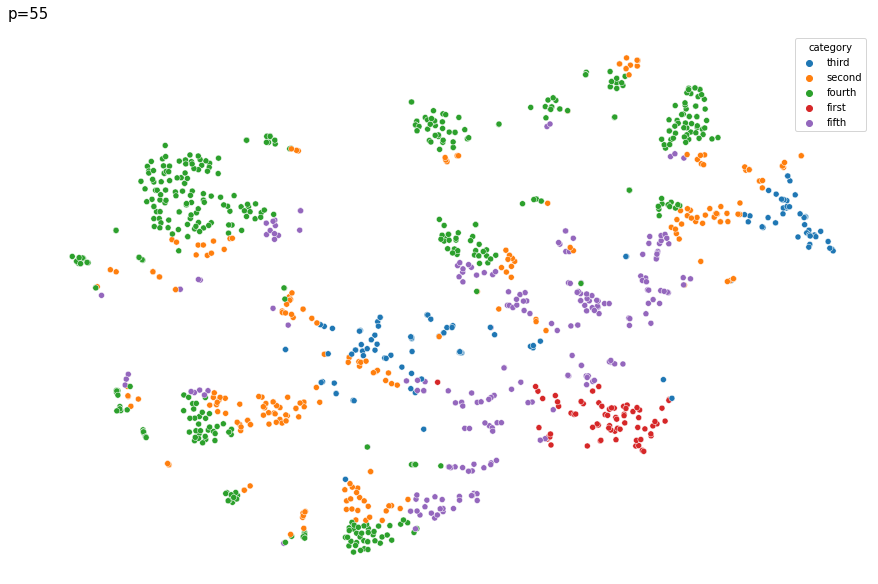

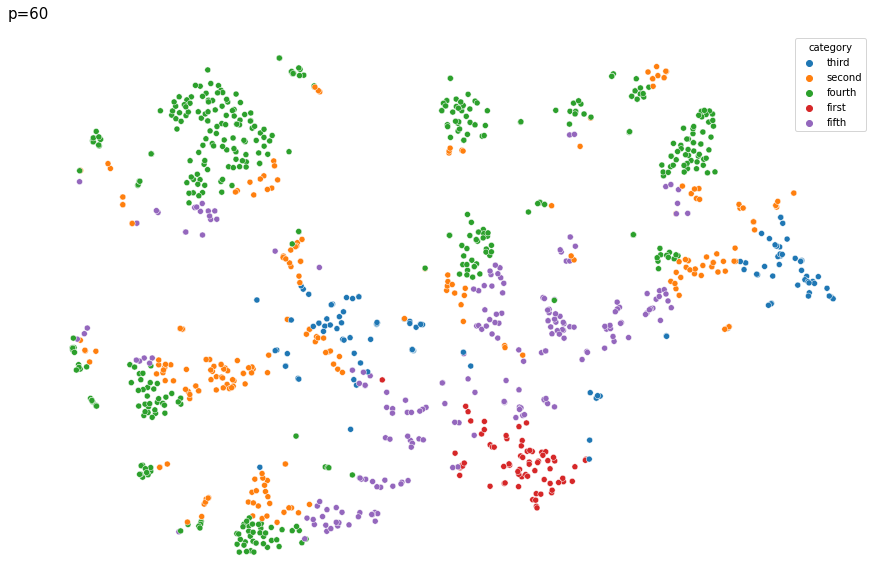

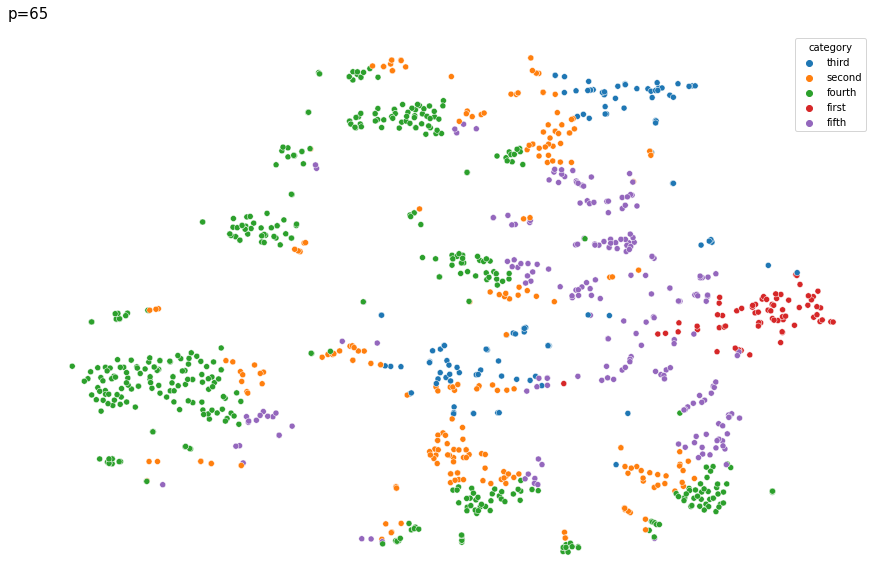

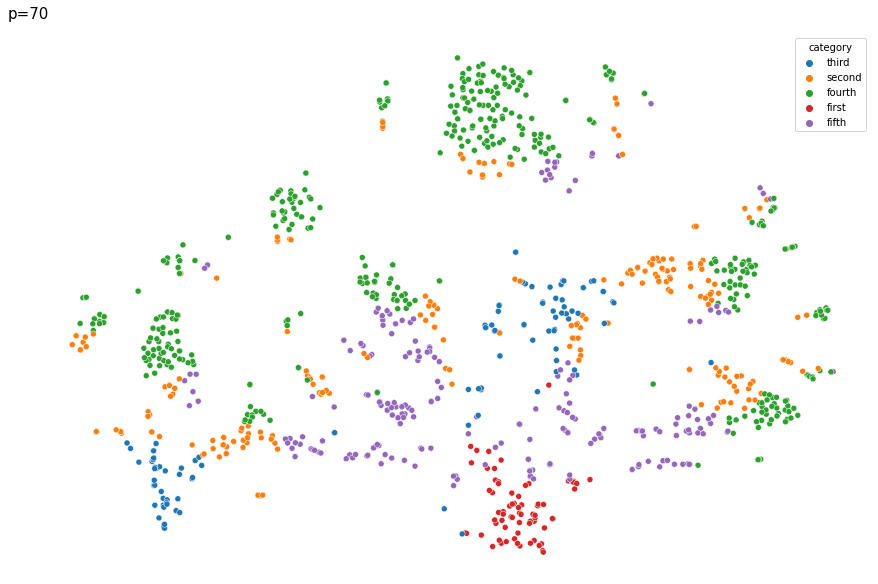

In [15]:
p_s = [30, 35, 40, 45, 50, 55, 60, 65, 70]

for i in p_s:
    tsne = TSNE(perplexity=i, n_iter=10000, init='random', random_state=137)

    embed = tsne.fit_transform(pots_encoded)

    fig, ax = plt.subplots(figsize = (15, 10))
    sns.scatterplot(x=embed[:,0], y=embed[:,1], hue=pots.category)
    fig.text(0.1, 0.9, 'p={}'.format(str(i)), size=15)
    ax.axis('off');

<AxesSubplot:>

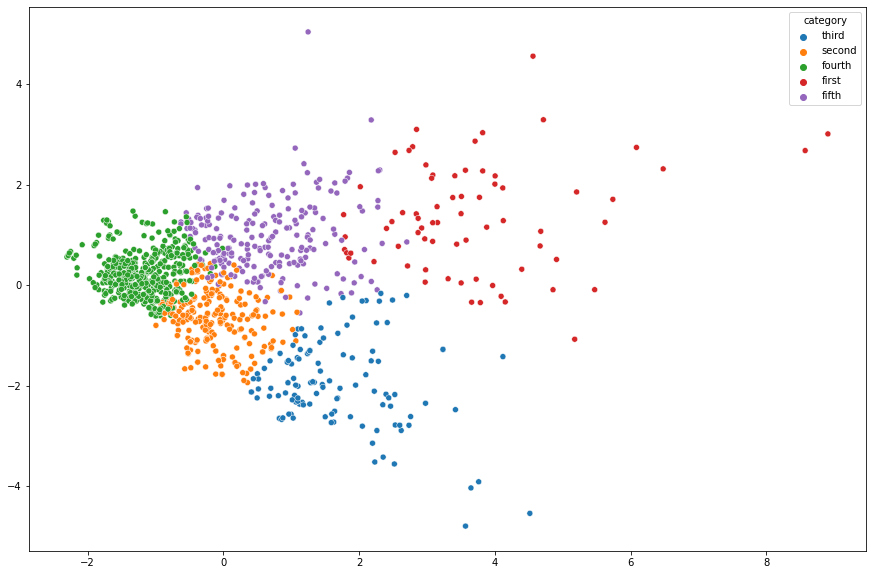

In [16]:
pca = PCA(n_components=2)
embed = pca.fit_transform(pots_encoded)

plt.figure(figsize = (15, 10))
sns.scatterplot(x=embed[:,0], y=embed[:,1], hue=pots.category)


## Interpreting clusters (renamed as 'category')

In [17]:
pots.rename(columns = {'cluster labels':'count'}, inplace = True)
pots.groupby('category').agg(
    {
        'count':'count',
        'materials': lambda x: x.value_counts().index[0],
        'technique': lambda x: x.value_counts().index[0],
        'firing': lambda x: x.value_counts().index[0],
        'decoration': lambda x: x.value_counts().index[0],
        'price': 'mean',
        'height': 'mean',
        'width': 'mean',
        'depth': 'mean'
    }
).round(1).reset_index()

,category,count,materials,technique,firing,decoration,price,height,width,depth
0,fifth,215,Stoneware,Hand built,Electric,Glaze,515.3,28.5,17.5,10.8
1,first,71,Stoneware,Hand built,Electric,Glaze,2084.0,33.1,28.3,16.5
2,fourth,471,Porcelain,Thrown,Electric,Glaze,124.9,11.0,9.6,8.2
3,second,249,Stoneware,Thrown,Electric,Glaze,164.6,10.0,18.1,13.1
4,third,120,Earthenware,Hand built,Electric,Glaze,365.4,9.6,30.5,20.7


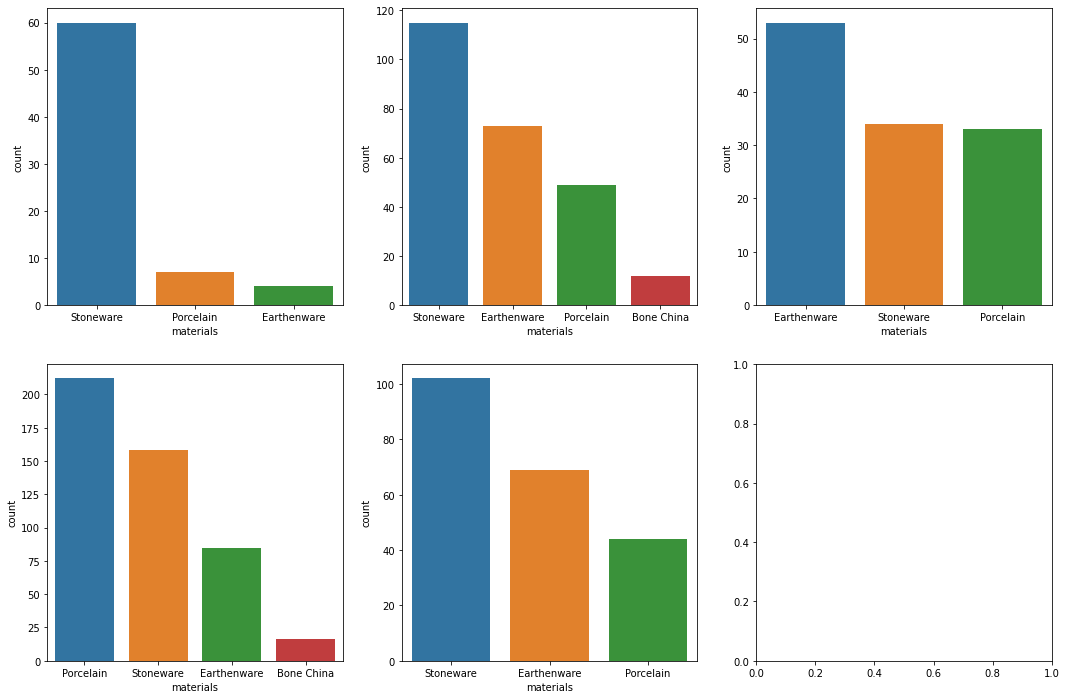

In [18]:
categories = ['first', 'second', 'third', 'fourth', 'fifth']
colors = ['red','green','blue','purple']


fig, axs = plt.subplots(2, 3, figsize=(18, 12))
for i in range(len(categories)):
    bars = pots.loc[pots["category"]==categories[i], 'materials']
    bars = bars.reset_index(name='materials').groupby("materials").size()
    bars = bars.reset_index(name='count').sort_values("count", ascending = False)
    sns.barplot(x="materials", y="count", data=bars, ax=axs.ravel()[i])
    ax = axs.ravel()[i]


Seems to be that the clusters are well motivated and the inspection of the table above works well given that the most common material tends to be distinguishably more common than the subsequent materials. this is particularly the case with the fourth cluster.

'first' — small, thrown porcelain

'second' — small, thrown stoneware

'third' — medium, hand built

'fourth' — large, ornate hand built

'fifth' — large, flat hand built earthenware

In [19]:
pots.to_csv("Pots_clean_labelled.csv")

In [20]:
pd.read_csv("Pots_clean_labelled.csv")

,Unnamed: 0,productcode,price,maker,name,description,height,width,depth,materials,technique,firing,decoration,count,category
0,0,AM470Y165,47.0,Andy Mason,ovalled bowl cream satin motif,this stoneware bowl is wheel-thrown with a cre...,8.0,25.5,22.0,Stoneware,Thrown,Electric,Glaze,2,third
1,1,AM470Y164,47.0,Andy Mason,ovalled bowl cream satin motif,this stoneware bowl is wheel-thrown with a cre...,8.0,25.0,22.0,Stoneware,Thrown,Electric,Glaze,2,third
2,2,AM470Y163,38.0,Andy Mason,dinner plate cream satin plain,this stoneware plate is wheel-thrown with a cr...,3.0,25.0,15.3,Stoneware,Thrown,Electric,Glaze,1,second
3,3,AM470Y162,38.0,Andy Mason,dinner plate cream satin plain,this stoneware plate is wheel-thrown with a cr...,3.0,25.0,15.3,Stoneware,Thrown,Electric,Glaze,1,second
4,4,AM470Y161,38.0,Andy Mason,dinner plate cream satin plain,this stoneware plate is wheel-thrown with a cr...,3.0,24.5,15.1,Stoneware,Thrown,Electric,Glaze,1,second
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,1121,GS220Y181,342.0,Geoffrey Swindell,Lidded Round Vessel,"a satisfying shape to view and hold, this roun...",10.0,8.0,8.1,Porcelain,Thrown,Electric,Slip decoration,3,fourth
1122,1122,SJ424Y91,340.0,Sarah Jenkins,Light Blue Landscape Bowl,intricate markings reach across the surface of...,17.0,20.0,13.1,Stoneware,Hand built,Electric,Slip decoration,1,second
1123,1123,SJ424Y107,320.0,Sarah Jenkins,Dark Blue Landscape Bowl,this large sarah jenkins bowl is the centre pi...,15.0,21.0,13.6,Bone China,Hand built,Electric,Slip decoration,1,second
1124,1124,118Y404,195.0,Clare Conrad,Cylinder Vessel,decorated with beautiful hues this is the perf...,19.0,10.0,8.9,Stoneware,Thrown,Electric,Slip decoration,3,fourth
